In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_tools import pca_scores
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
team_stats = pd.read_csv('team_stats.csv', index_col=0)

In [3]:
team_stats.loc['NO2016']

Season                         2016
Team                             NO
Carries                         395
rushing_yds                    1847
Fumbles                           2
Receptions                      472
receiving_yds                  5270
Attempts                        670
Completions                     472
Comp_Perc                  0.704478
passing_yds                    5270
Total_Raw_AirYards             4816
Total_Comp_AirYards            2802
TimesHit                         38
Interceptions                    16
TDs                              41
WR1                         0.22334
WR2                         0.21575
WR3                        0.169829
TE1                        0.121063
TE2                       0.0267552
RB1_rec                   0.0628083
RB2_rec                   0.0533207
RB1_rush                   0.567407
RB2_rush                   0.296697
RB3_rush                  0.0173254
QB_rush                   0.0173254
air_pct                    0

(0.28929756501722881, 2.5120531510549882e-06)


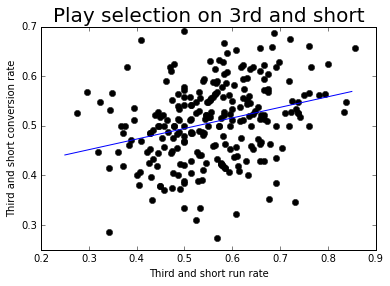

In [4]:
# Play selection on 3rd and short (1 <= yards to go <= 2)
plt.plot(team_stats.third_short_run_rate, team_stats.third_short_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.third_short_run_rate, team_stats.third_short_rate)
x = np.arange(0.25, .9, 0.05)
y = m * x + b
plt.plot(x, y)
plt.xlabel('Third and short run rate')
plt.ylabel('Third and short conversion rate')
plt.title('Play selection on 3rd and short', fontsize=20)
plt.savefig('3rd_short_play_selection.pdf')
print(r_value, p_value)

(0.33120722931887447, 5.7200595180510798e-08)


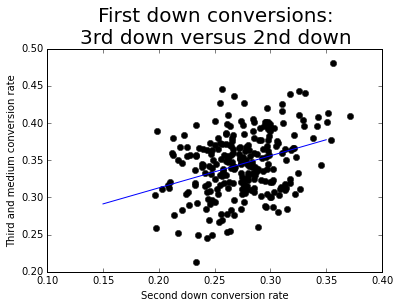

In [5]:
# Early conversion versus 3rd and mid conversion
plt.plot(team_stats.second_rate, team_stats.third_mid_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.second_rate, team_stats.third_mid_rate)
x = np.arange(0.15, 0.4, 0.05)
y = m * x + b
plt.plot(x, y)
plt.xlabel('Second down conversion rate')
plt.ylabel('Third and medium conversion rate')
plt.title('First down conversions: \n3rd down versus 2nd down', fontsize=20)
plt.savefig('2nd_versus_3rd.pdf')
print(r_value, p_value)

(-0.013359655540941815, 0.83154699873701443)


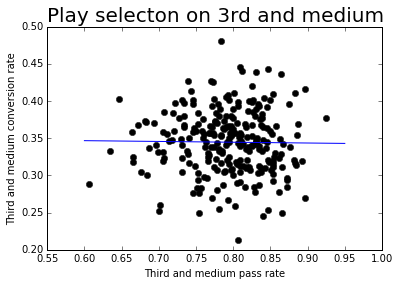

In [6]:
# Play selection on 3rd and mid
plt.plot(team_stats.third_mid_pass_rate, team_stats.third_mid_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.third_mid_pass_rate, team_stats.third_mid_rate)
x = np.arange(0.6, 1., 0.05)
y = m * x + b
plt.plot(x, y)
plt.xlabel('Third and medium pass rate')
plt.ylabel('Third and medium conversion rate')
plt.title('Play selecton on 3rd and medium', fontsize=20)
plt.savefig('3rd_medium_play_selection.pdf')
print(r_value, p_value)

(-0.36056005140695557, 2.8192978676022894e-09)


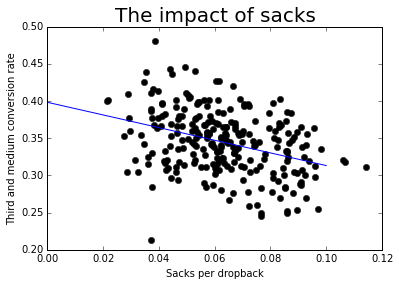

In [7]:
# Sack rate versus third and mid
plt.plot(team_stats.sack_rate, team_stats.third_mid_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.sack_rate, team_stats.third_mid_rate)
x = np.arange(0.0, .15, 0.1)
y = m * x + b
plt.plot(x, y)
plt.xlabel('Sacks per dropback')
plt.ylabel('Third and medium conversion rate')
plt.title('The impact of sacks', fontsize=20)
plt.savefig('3rd_medium_sacks.pdf')
print(r_value, p_value)
